In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Założenia
* zaszczepiony 0, ozdrowiały 1, podatny 2, chory 3
* generujemy liczbę losową z rozkładu równomiernego, którą następnie porównujemy z progiem wynoszącym $\beta$ dla zarażenia i $\gamma$ dla wyzdrowienia

# Co dodatkowo można zrobić ale jest czasochłonne
* zamodelowac podatności na zachorowanie itd. w odniesieniu do wieku osobnika, wiek generowany zgodnie z rozkładem wieku populacji w PL

# Building blocks

In [154]:
def InitializeIll(population, n):
    size = population.shape[0]
    curr = 0
    while curr < n:
        x = np.random.randint(size)
        y = np.random.randint(size)
        if population[x,y] == 2:
            population[x,y] = 3
            curr += 1

def InitializeHealed(population, n):
    size = population.shape[0]
    curr = 0
    while curr < n:
        x = np.random.randint(size)
        y = np.random.randint(size)
        if population[x,y] == 2:
            population[x,y] = 1
            curr += 1

def spreadVirus(population, beta):
    xneigh = np.array([-1,0,0,0,1])
    yneigh = np.array([0,1,0,-1,0])
    size = population.shape[0]
    idx = np.argwhere(population==3)
    for i in range(len(idx)):
        for j in range(5):
            try:
                if np.random.rand() < beta and population[idx[i][0]+xneigh[j], idx[i][1]+yneigh[j]] == 2:
                    population[idx[i][0]+xneigh[j], idx[i][1]+yneigh[j]] = 3
            except:
                pass

def healPeople(population, gamma):
    # założenie wyzdrownieńcy się nie szczepią
    size = population.shape[0]
    idx = np.argwhere(population==3)
    for i in range(len(idx)):
        if np.random.rand() < gamma:
            population[idx[i][0], idx[i][1]] = 1

def makeHealedSusceptible(population, susceptibility):
    size = population.shape[0]
    idx = np.argwhere(population==1)
    for i in range(len(idx)):
        if np.random.rand() < susceptibility:
            population[idx[i][0], idx[i][1]] = 2

def vaccinate(population, n):
    size = population.shape[0]
    curr = 0
    while curr < n or len(np.argwhere(population==2)) < n:
        x = np.random.randint(size)
        y = np.random.randint(size)
        if population[x,y] == 2:
            population[x,y] = 0
            curr += 1

def makeVaccinatedSusceptible(population, susceptibility):
    size = population.shape[0]
    idx = np.argwhere(population==0)
    for i in range(len(idx)):
        if np.random.rand() < susceptibility:
            population[idx[i][0], idx[i][1]] = 2

def runOneDay(population, beta, gamma, avgDaysTillSusciptable, avgVaccinationDuratino, nVaccinated):
    spreadVirus(population, beta)
    healPeople(population, gamma)
    makeHealedSusceptible(population, 1/avgDaysTillSusciptable)
    vaccinate(population, nVaccinated)
    makeVaccinatedSusceptible(population, 1/avgVaccinationDuratino)

def calculateMetrics(population, df, day):
    # zaszczepiony 0, ozdrowiały 1, podatny 2, chory 3
    vaccinated = len(np.argwhere(population==0))
    healed = len(np.argwhere(population==1))
    susciptable = len(np.argwhere(population==2))
    ill = len(np.argwhere(population==3))
    df = pd.concat([df , pd.DataFrame({'day':[day], 'vaccinated':[vaccinated], 'healed':[healed], 'susciptable':[susciptable], 'ill':[ill]})])
    return df

def runSimulation(N, beta, gamma, avgDaysTillSusciptable, avgVaccinationDuratino, nVaccinated, dayOneCases, days, visualize):
    a = int(np.sqrt(N))
    df = pd.DataFrame(columns=['day','vaccinated', 'healed', 'susciptable', 'ill'])

    population = np.zeros(shape=(a,a)) + 2

    InitializeIll(population, dayOneCases) # mhh jaki pyszny nietoperz

    for day in range(days):

        runOneDay(population, beta[day], gamma, avgDaysTillSusciptable, avgVaccinationDuratino, nVaccinated)
        df = calculateMetrics(population, df, day)
    df.set_index('day', inplace=True)
    if visualize:
        plt.figure(figsize=(20,10))
        plt.plot(df['vaccinated'])
        plt.plot(df['healed'])
        plt.plot(df['susciptable'])
        plt.plot(df['ill'])
        plt.legend(['vaccinated', 'healed', 'susciptable', 'ill'])
        plt.show()
    return df

# Execution

c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


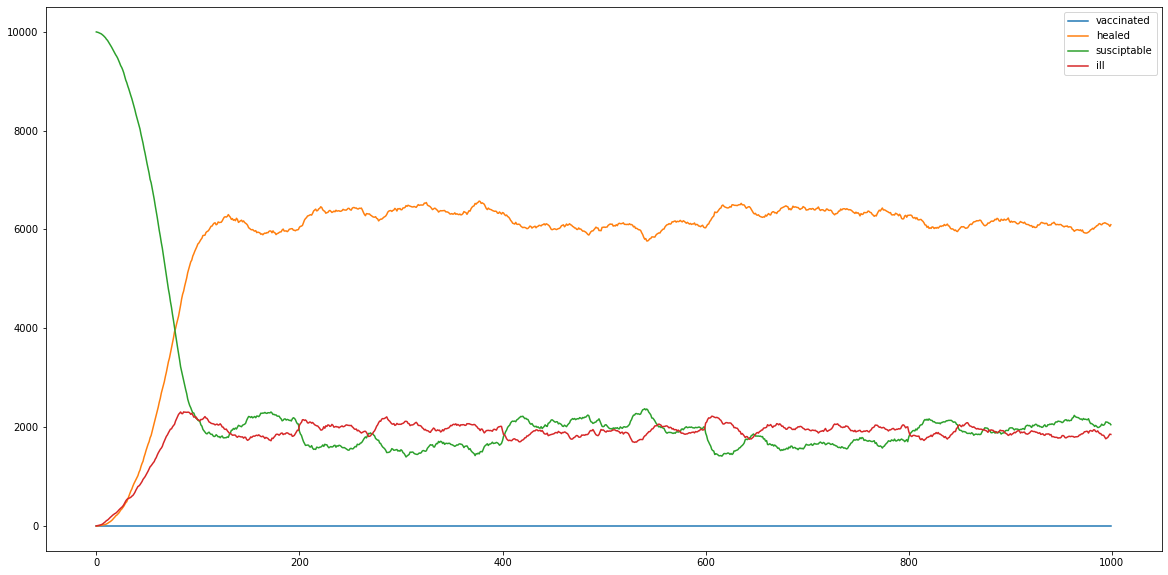

In [155]:
# parameters
N = 10000
dayOneCases = 1
days = 1000
gamma, avgDaysTillSusciptable, avgVaccinationDuratino, nVaccinated = 0.1, 30, 120, 0
beta = np.concatenate([np.ones(shape=(200))*0.5, np.ones(shape=(200))*0.8,np.ones(shape=(200))*0.5, np.ones(shape=(200))*0.8,np.ones(shape=(200))*0.5, np.ones(shape=(200))*0.8])

df = runSimulation(N, beta, gamma, avgDaysTillSusciptable, avgVaccinationDuratino, nVaccinated, dayOneCases, days, 1)

c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


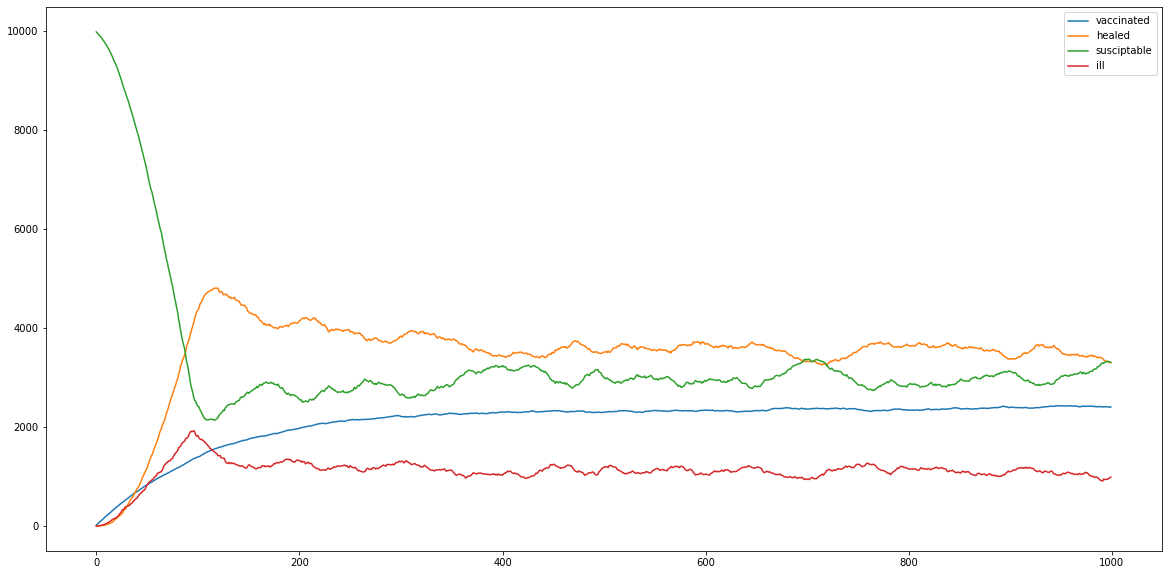

In [140]:
# parameters
N = 10000
dayOneCases = 1
days = 1000
gamma, avgDaysTillSusciptable, avgVaccinationDuratino, nVaccinated = 0.1, 30, 120, 20
beta = np.concatenate([np.ones(shape=(days))*0.5])

df = runSimulation(N, beta, gamma, avgDaysTillSusciptable, avgVaccinationDuratino, nVaccinated, dayOneCases, days, 1)

c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


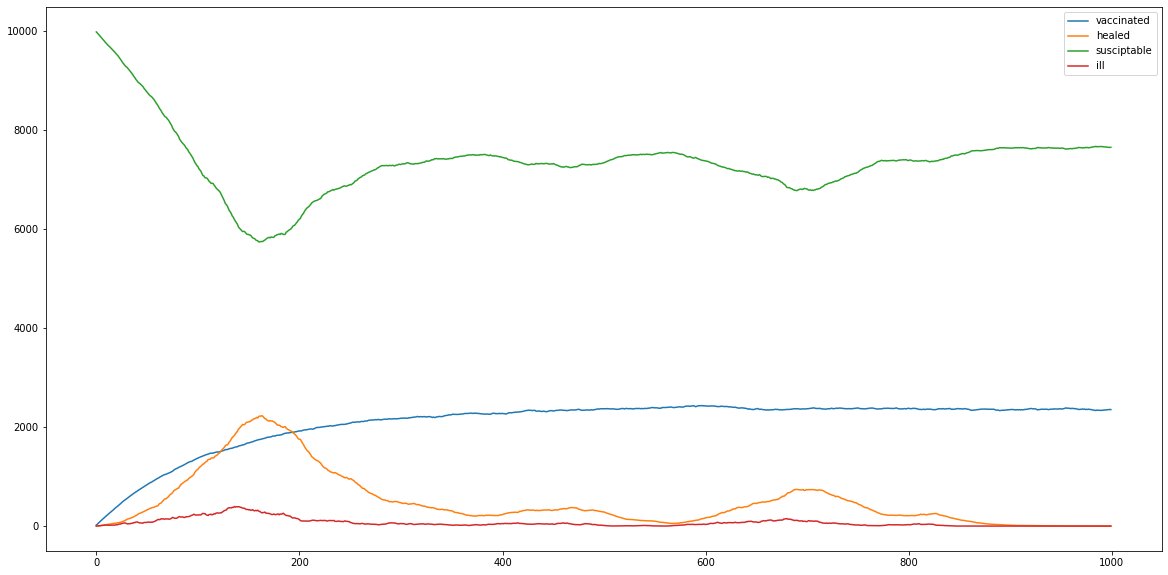

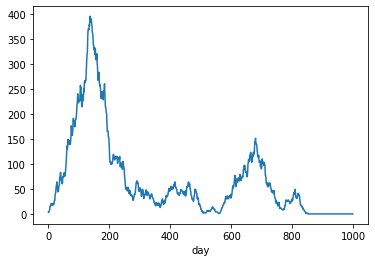

In [147]:
# parameters
N = 10000
dayOneCases = 1
days = 1000
gamma, avgDaysTillSusciptable, avgVaccinationDuratino, nVaccinated = 0.2, 30, 120, 20
beta = np.concatenate([np.ones(shape=(days))*0.5])

df = runSimulation(N, beta, gamma, avgDaysTillSusciptable, avgVaccinationDuratino, nVaccinated, dayOneCases, days, 1)
df['ill'].plot()
plt.show()

To jest to co chciałem osiągnąć, takie parametry by było więcej "szczytów". Jak widać wygląda to bardzo podobnie do prawdziwego przebiegu pandemii, co dowodzi, że nawet takie proste modelowanie pozwala na odwzorowanie ogólnych charakterystyk pandemii. Powtórzy jeszcze raz by sprawdzić czy to nie przypadek

c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


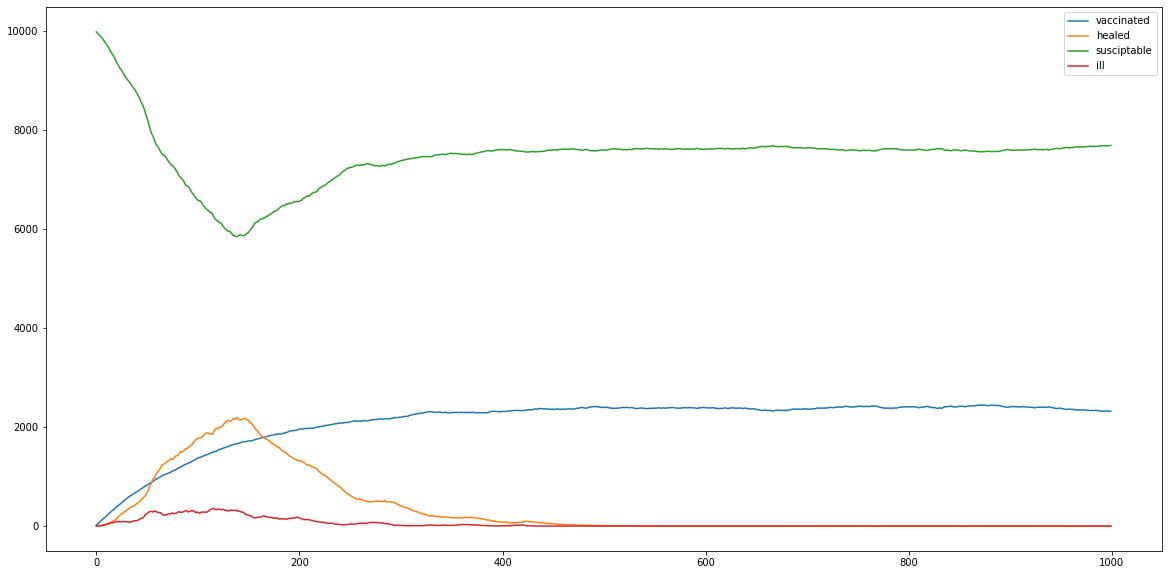

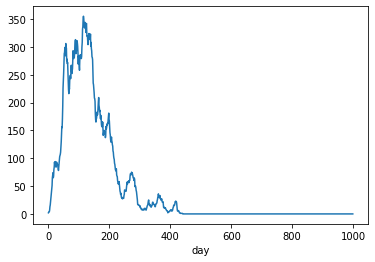

In [150]:
# parameters
N = 10000
dayOneCases = 1
days = 1000
gamma, avgDaysTillSusciptable, avgVaccinationDuratino, nVaccinated = 0.2, 30, 120, 20
beta = np.concatenate([np.ones(shape=(days))*0.5])

df = runSimulation(N, beta, gamma, avgDaysTillSusciptable, avgVaccinationDuratino, nVaccinated, dayOneCases, days, 1)
df['ill'].plot()
plt.show()

c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


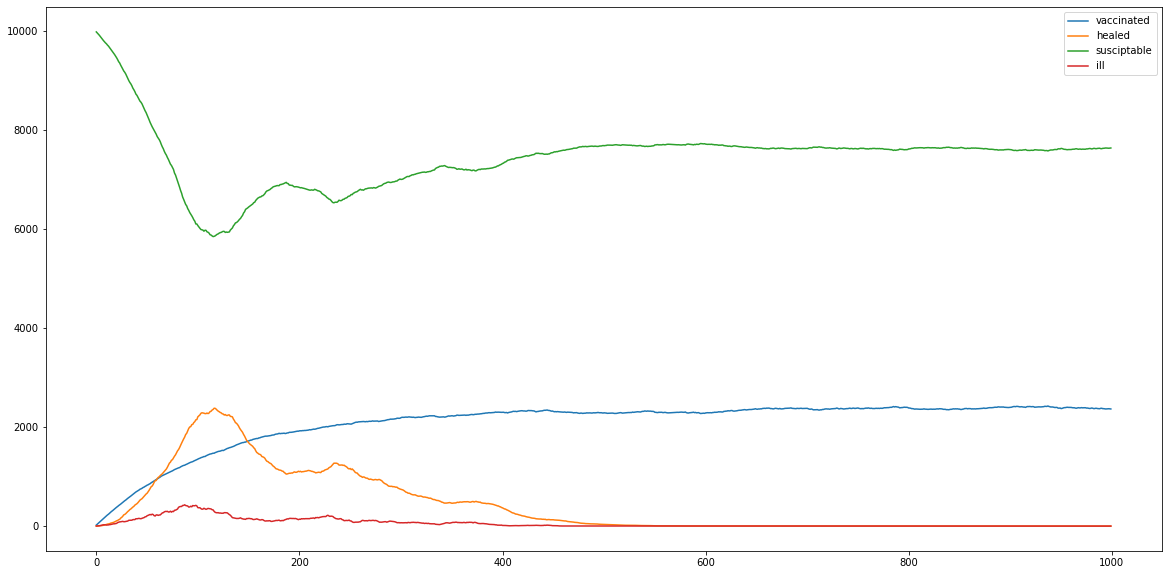

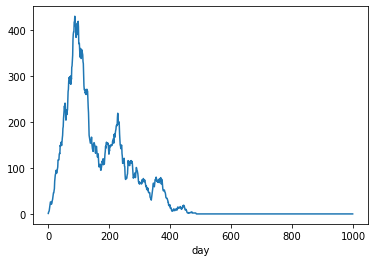

In [151]:
# parameters
N = 10000
dayOneCases = 1
days = 1000
gamma, avgDaysTillSusciptable, avgVaccinationDuratino, nVaccinated = 0.2, 30, 120, 20
beta = np.concatenate([np.ones(shape=(days))*0.5])

df = runSimulation(N, beta, gamma, avgDaysTillSusciptable, avgVaccinationDuratino, nVaccinated, dayOneCases, days, 1)
df['ill'].plot()
plt.show()

Konkretne realizacje wyglądają inaczej ale powiedziałbym, że i tak wyglądają dosyć realistycznie.

c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexes\base.py:6982: Fut

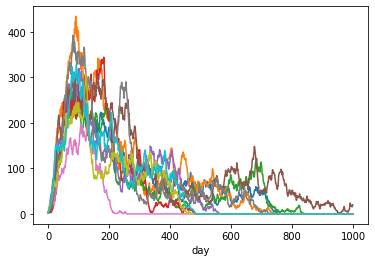

In [156]:
# parameters
N = 10000
dayOneCases = 1
days = 1000
gamma, avgDaysTillSusciptable, avgVaccinationDuratino, nVaccinated = 0.2, 30, 120, 20
beta = np.concatenate([np.ones(shape=(days))*0.5])

for i in range(10):
    df = runSimulation(N, beta, gamma, avgDaysTillSusciptable, avgVaccinationDuratino, nVaccinated, dayOneCases, days, 0)
    df['ill'].plot()
plt.show()

Nie wiem co odkrywczego powiedzieć na temat tego wykresu, ale był taki w instrukcji to też zrobiłem.

# Wnioski
Można bardzo wiele ciekawych efektów zaobserwować zmieniając odpowiednio parametry. Niestety nie mam czasu sprawdzić wszystkiego, ale parametry mają bardzo istotny wpływ na przebieg pandemii. Np. da się dobrać takie parametry by pandemia trawała bez przeryw oraz takie by skończyła się wcześniej bądź później. Liczba zachorowań i to na jakim poziomie się utrzymują, jaka jest ich maksymalna liczba itd. zależą bezpośrednio od parametrów.

Przedstawione symulacje da się dowolnie skomplikować o kolejne parametry, bądź podanie parametrów wyestymowanych na podstawie prawdziewj pandemii, jednakże udało się osiągnąć zamierzony efekt więc nie komplikowałem bardziej symulacji.

# Proof of concept
tzn widać na kolejnych obrazkach, że działa

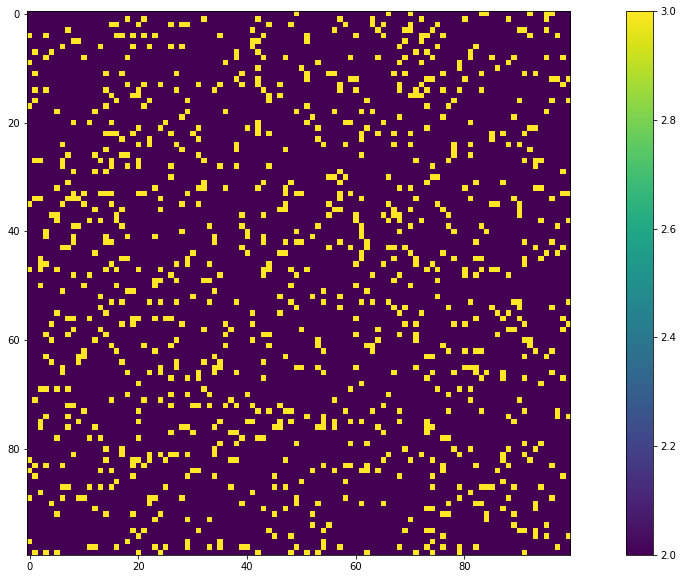

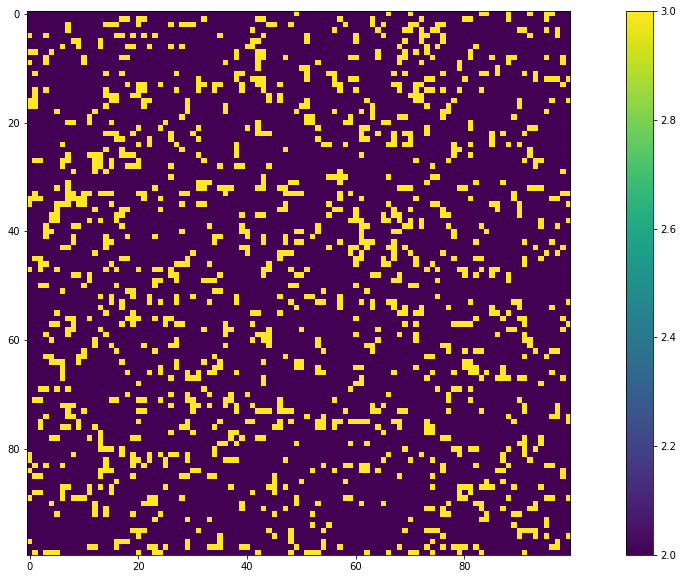

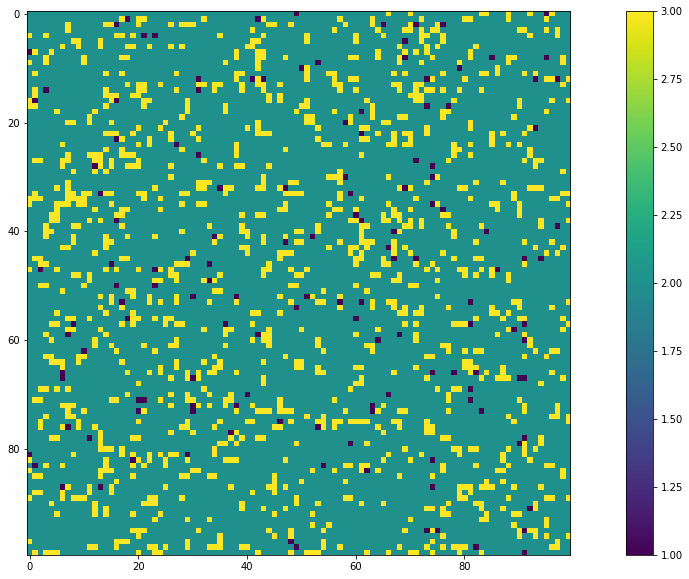

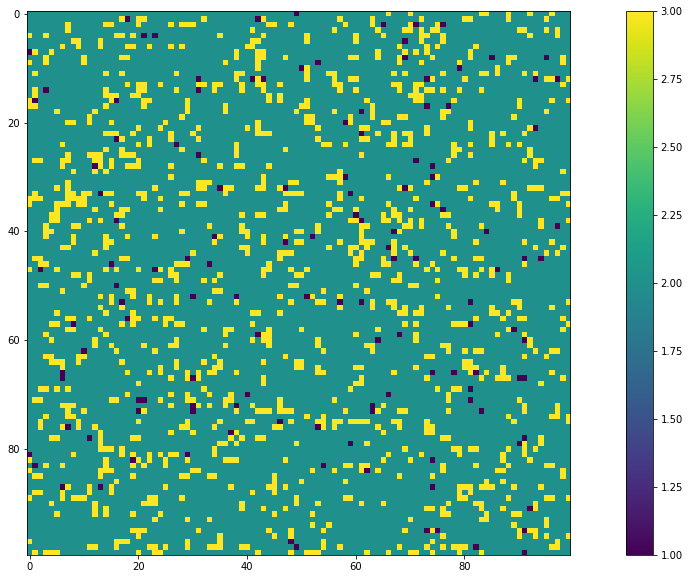

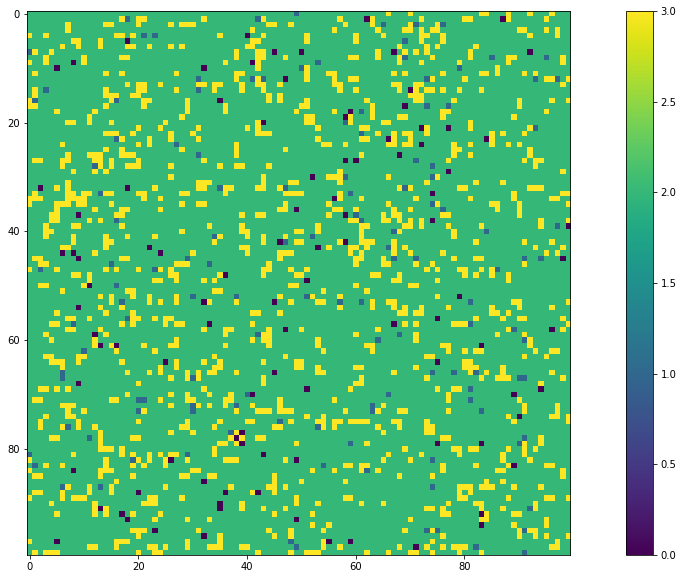

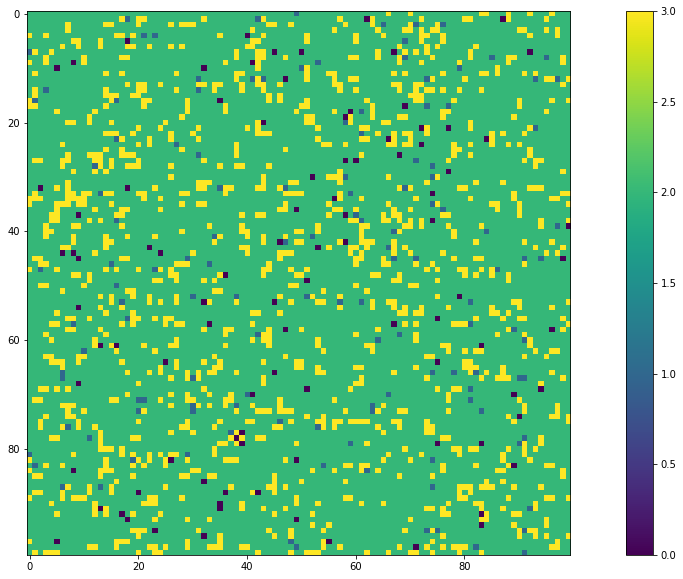

In [72]:
def runOneDay(population, beta, gamma, avgDaysTillSusciptable, avgVaccinationDuratino, nVaccinated):
    spreadVirus(population, beta)
    plt.figure(figsize=(20,10))
    plt.imshow(population)
    plt.colorbar()
    plt.show()
    healPeople(population, gamma)
    plt.figure(figsize=(20,10))
    plt.imshow(population)
    plt.colorbar()
    plt.show()
    makeHealedSusceptible(population, 1/avgDaysTillSusciptable)
    plt.figure(figsize=(20,10))
    plt.imshow(population)
    plt.colorbar()
    plt.show()
    vaccinate(population, nVaccinated)
    plt.figure(figsize=(20,10))
    plt.imshow(population)
    plt.colorbar()
    plt.show()
    makeVaccinatedSusceptible(population, 1/avgVaccinationDuratino)

N = 10000 # populacja
a = int(np.sqrt(N))

population = np.zeros(shape=(a,a)) + 2

InitializeIll(population, 1000)

plt.figure(figsize=(20,10))
plt.imshow(population)
plt.colorbar()
plt.show()

beta, gamma, avgDaysTillSusciptable, avgVaccinationDuratino, nVaccinated = 0.1, 0.1, 10, 10, 100

runOneDay(population, beta, gamma, avgDaysTillSusciptable, avgVaccinationDuratino, nVaccinated)

plt.figure(figsize=(20,10))
plt.imshow(population)
plt.colorbar()
plt.show()

tu widać, że coś się zmienia w kolejnych dniach więc działa

c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


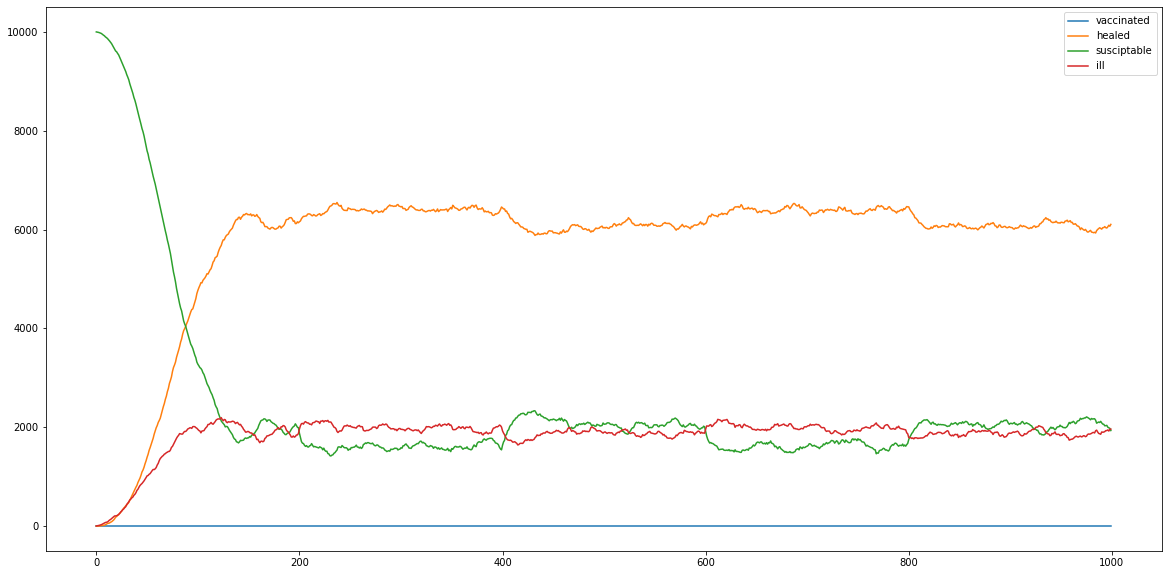

In [127]:
# parameters
N = 10000
beta, gamma, avgDaysTillSusciptable, avgVaccinationDuratino, nVaccinated = 0.9, 0.1, 30, 120, 0

beta = np.concatenate([np.ones(shape=(200))*0.5, np.ones(shape=(200))*0.8,np.ones(shape=(200))*0.5, np.ones(shape=(200))*0.8,np.ones(shape=(200))*0.5, np.ones(shape=(200))*0.8])

a = int(np.sqrt(N))
df = pd.DataFrame(columns=['day','vaccinated', 'healed', 'susciptable', 'ill'])

population = np.zeros(shape=(a,a)) + 2

InitializeIll(population, 1) # mhh jaki pyszny nietoperz

for day in range(1000):

    runOneDay(population, beta[day], gamma, avgDaysTillSusciptable, avgVaccinationDuratino, nVaccinated)
    df = calculateMetrics(population, df, day)
df.set_index('day', inplace=True)
plt.figure(figsize=(20,10))
plt.plot(df['vaccinated'])
plt.plot(df['healed'])
plt.plot(df['susciptable'])
plt.plot(df['ill'])
plt.legend(['vaccinated', 'healed', 'susciptable', 'ill'])